<a href="https://colab.research.google.com/github/dvsmihir1/ML-Lab/blob/main/ML_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1) Evaluate the intraclass spread and interclass distances between the classes in your dataset. If
your data deals with multiple classes, you can take any two classes. Steps below (refer below
diagram for understanding):

• Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy.mean() function for finding the average vector for all
vectors in a given class. Please define the axis property appropriately to use this function. EX:
feat_vecs.mean(axis=0))

• Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy.std() function for finding the standard deviation vector
for all vectors in a given class. Please define the axis property appropriately to use this
function.)

• Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean
distance between two centroids.)

In [8]:
pip install vitaldb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.2 MB/s eta 0:00:00


In [59]:
import pandas as pd
import numpy as np
dfcases = pd.read_csv("https://api.vitaldb.net/cases")  # Load clinical information from VitalDB.
num = dfcases.select_dtypes(exclude=["object"])  # Select only numeric data, excluding any non-numeric (object) types.
centroidweight = num["weight"].mean(axis=0)  # Calculate the mean (centroid) of the 'weight' column.
centroidbmi = num["bmi"].mean(axis=0)  # Calculate the mean (centroid) of the 'bmi' column.
spreadweight = num["weight"].std(axis=0)  # Calculate the standard deviation (spread) of the 'weight' column.
spreadbmi = num["bmi"].std(axis=0)  # Calculate the standard deviation (spread) of the 'bmi' column.
distance = np.linalg.norm(centroidweight - centroidbmi)  # Calculate the Euclidean distance between the centroids of 'weight' and 'bmi'.
print("The distance is", distance)  # Print the calculated distance (which isn't meaningful due to the unit mismatch).


The distance is 38.20639949906074
38.20639949906074


A2) Take any feature from your dataset. Observe the density pattern for that feature by plotting the
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and
variance from the available data.  
(Suggestion: numpy.histogram()gives the histogram data. Plot of histogram may be
achieved with matplotlib.pyplot.hist())

In [26]:
dfcases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6388 entries, 0 to 6387
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseid               6388 non-null   int64  
 1   subjectid            6388 non-null   int64  
 2   casestart            6388 non-null   int64  
 3   caseend              6388 non-null   int64  
 4   anestart             6388 non-null   int64  
 5   aneend               6388 non-null   float64
 6   opstart              6388 non-null   int64  
 7   opend                6388 non-null   int64  
 8   adm                  6388 non-null   int64  
 9   dis                  6388 non-null   int64  
 10  icu_days             6388 non-null   int64  
 11  death_inhosp         6388 non-null   int64  
 12  age                  6388 non-null   float64
 13  sex                  6388 non-null   object 
 14  height               6388 non-null   float64
 15  weight               6388 non-null   f

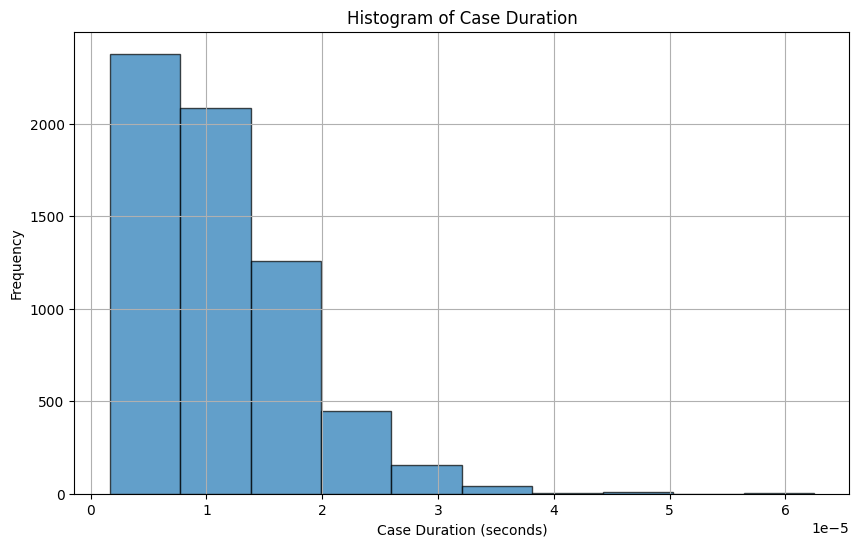

Mean of Case Duration: 0.00 seconds
Variance of Case Duration: 0.00 seconds^2


In [29]:
import matplotlib.pyplot as plt
dfCases = pd.read_csv("https://api.vitaldb.net/cases")  # Read the clinical data from the provided URL
# Calculate caseduration
dfCases["caseduration"] = pd.to_datetime(dfCases["caseend"]) - pd.to_datetime(dfCases["casestart"])  # Compute the difference between case end and start times
# Convert caseduration to total seconds for numerical analysis
dfCases["caseduration"] = dfCases["caseduration"].dt.total_seconds()  # Convert the time difference into total seconds
# Drop any NaN values that might result from invalid or missing data
dfCases = dfCases.dropna(subset=["caseduration"])  # Remove rows where 'caseduration' is NaN
# Calculate histogram data
hist, bins = np.histogram(dfCases["caseduration"], bins=10)  # Calculate histogram data for 'caseduration' with 10 bins
# Plot histogram
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.hist(dfCases["caseduration"], bins=bins, edgecolor='black', alpha=0.7)  # Plot the histogram with black edges and semi-transparent bars
plt.title("Histogram of Case Duration")  # Set the title of the plot
plt.xlabel("Case Duration (seconds)")  # Label the x-axis
plt.ylabel("Frequency")  # Label the y-axis
plt.grid(True)  # Enable grid lines for better readability
plt.show()  # Display the plot


In [47]:
threshold_minutes = 240 * 60  # Define the threshold for long cases as 240 minutes, converted to seconds (240 * 60)
# Classify cases based on duration
dfCases['case_duration_class'] = dfCases['caseduration'].apply(lambda x: 'long' if x > threshold_minutes else 'short')
# Create a new column 'case_duration_class' where each case is labeled 'long' if its duration exceeds the threshold, otherwise 'short'

In [34]:
# Calculate mean and variance
mean_caseduration = dfCases["caseduration"].mean()
variance_caseduration = dfCases["caseduration"].var()
print("Mean of Case Duration:", mean_caseduration)
print("Variance of Case Duration:", variance_caseduration)



Mean of Case Duration: 1.134868065122104e-05
Variance of Case Duration: 4.4335713363164e-11


 A3) Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1
to 10. Make a plot of the distance and observe the nature of this graph. A

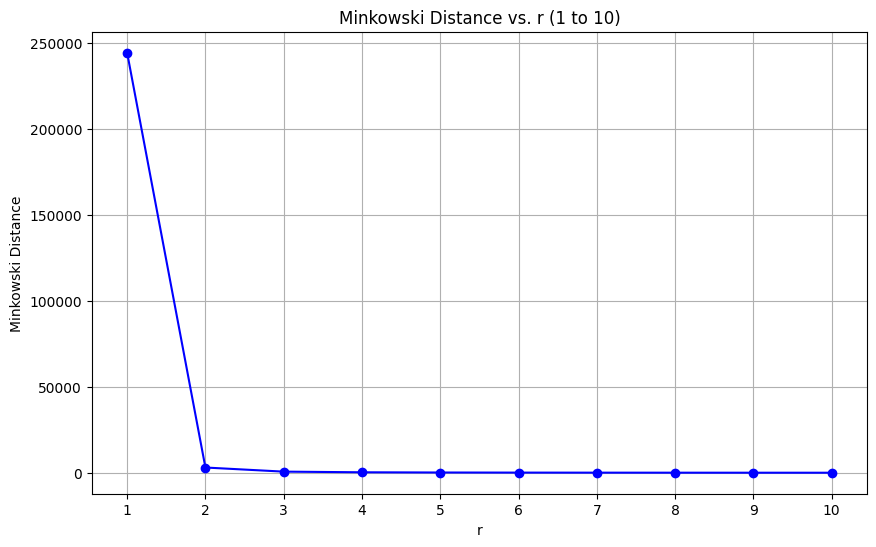

Minkowski Distances for r=1 to r=10: [244387.28, 3142.5554470526054, 749.2452668888051, 370.64524728541727, 245.5417591347307, 188.2781451869384, 157.00233203039792, 138.02474391743857, 125.74120812073282, 117.47621391776367]


In [35]:
from scipy.spatial.distance import minkowski  # Import the Minkowski distance function from SciPy
import matplotlib.pyplot as plt  # Import the plotting library
# Define the vectors for comparison
vector1 = dfCases["weight"].values  # Extract the 'weight' column as a NumPy array
vector2 = dfCases["bmi"].values  # Extract the 'bmi' column as a NumPy array
minkowski_distances = []  # Initialize an empty list to store Minkowski distances
# Compute Minkowski distances for different values of r
for r in range(1, 11):  # Iterate over r values from 1 to 10
    distance = minkowski(vector1, vector2, p=r)  # Calculate Minkowski distance with current r
    minkowski_distances.append(distance)  # Append the distance to the list
# Plot the Minkowski distance against r values
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.plot(range(1, 11), minkowski_distances, marker='o', linestyle='-', color='b')
# Plot the Minkowski distance vs. r with markers and a line
plt.title("Minkowski Distance vs. r (1 to 10)")  # Set the plot title
plt.xlabel("r")  # Label the x-axis
plt.ylabel("Minkowski Distance")  # Label the y-axis
plt.xticks(range(1, 11))  # Set x-ticks to match the range of r values
plt.grid(True)  # Enable grid lines for better readability
plt.show()  # Display the plot
print(f"Minkowski Distances for r=1 to r=10: {minkowski_distances}")  # Print the calculated distances

In [48]:
# Define features (X) and target (y)
X = dfCases[['casestart', 'caseend', 'caseduration']]  # Select features: start time, end time, and duration
y = dfCases['case_duration_class']  # Select target variable: case duration class (long or short)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split data with 30% of it reserved for testing and 70% for training; random_state=42 ensures reproducibility
# Print shapes of the resulting datasets
print("X_train shape:", X_train.shape)  # Print the shape of the training features
print("X_test shape:", X_test.shape)    # Print the shape of the testing features
print("y_train shape:", y_train.shape)  # Print the shape of the training target
print("y_test shape:", y_test.shape)    # Print the shape of the testing target

X_train shape: (4471, 3)
X_test shape: (1917, 3)
y_train shape: (4471,)
y_test shape: (1917,)


 A5)Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code
for help:
>>> import numpy as np
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y)

In [50]:
from sklearn.neighbors import KNeighborsClassifier  # Import the K-Nearest Neighbors classifier
# Initialize the K-Nearest Neighbors classifier with 3 neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier on the entire dataset
neigh.fit(X, y)
# Evaluate the classifier's performance on the test data
neigh.score(X_test, y_test)
# Return the accuracy of the classifier on the test set (proportion of correctly classified samples)

1.0

A6)Test the accuracy of the kNN using the test set obtained from above exercise. Following code for
help.

In [51]:
neigh.score(X_test, y_test) #Evaluate the accuracy

1.0

A7) Use the predict() function to study the prediction behavior of the classifier for test vectors. Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the
class of the test vector (test_vect is any feature vector from your test set).

In [52]:
neighbour.predict(X_test) # Predict the class labels for the test data

array(['short', 'short', 'short', ..., 'short', 'short', 'short'],
      dtype=object)

A8) Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to
11 and make an accuracy plot.

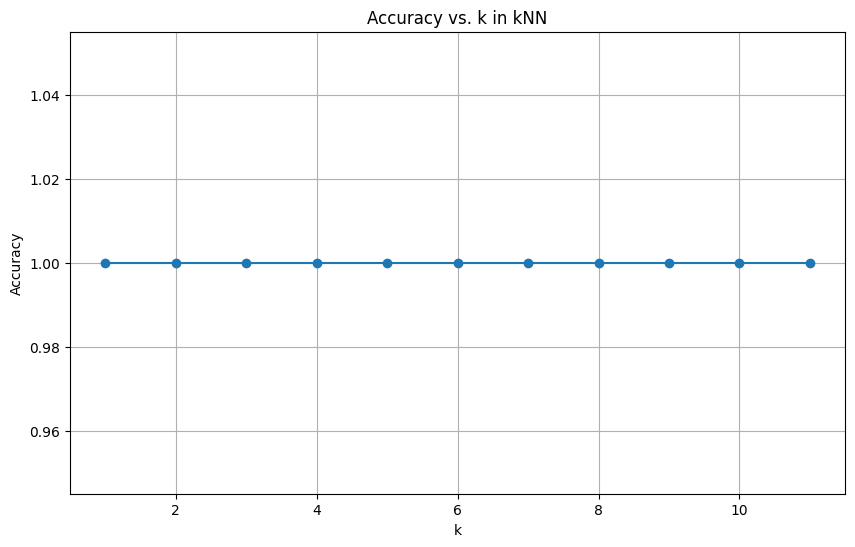

In [54]:
from sklearn.metrics import accuracy_score  # Import accuracy score metric
import matplotlib.pyplot as plt  # Import plotting library

# Define the range of k values to test
k_vals = list(range(1, 12))  # k values from 1 to 11
accuracies = []  # Initialize an empty list to store accuracy scores
# Iterate over each k value
for k in k_vals:
    # Initialize the K-Nearest Neighbors classifier with the current k
    neigh = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier on the training data
    neigh.fit(X_train, y_train)
    # Predict the class labels for the test data
    y_pred = neigh.predict(X_test)
    # Calculate accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    # Append the accuracy to the list
    accuracies.append(accuracy)
# Plot accuracy vs. k
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(k_vals, accuracies, marker='o', linestyle='-')
# Plot accuracy against k with markers and a line
plt.title('Accuracy vs. k in kNN')  # Set plot title
plt.xlabel('k')  # Label x-axis
plt.ylabel('Accuracy')  # Label y-axis
plt.grid(True)  # Enable grid lines for better readability
plt.show()  # Display the plot

A9) Please evaluate confusion matrix for your classification problem. From confusion matrix, the
other performance metrics such as precision, recall and F1-Score measures for both training and test
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [56]:
from sklearn.metrics import confusion_matrix, classification_report  # Import metrics for evaluating classification performance
# Predict class labels for the training data
y_train_pred = neigh.predict(X_train)
# Predict class labels for the test data
y_test_pred = neigh.predict(X_test)
# Calculate and print confusion matrix and classification report for training data
print("Training Data Performance:")
train_cm = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training data
print("Confusion Matrix:")
print(train_cm)  # Display confusion matrix
train_report = classification_report(y_train, y_train_pred)  # Compute classification report for training data
print("Classification Report:")
print(train_report)  # Display classification report
# Calculate and print confusion matrix and classification report for test data
print("\nTest Data Performance:")
test_cm = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test data
print("Confusion Matrix:")
print(test_cm)  # Display confusion matrix
test_report = classification_report(y_test, y_test_pred)  # Compute classification report for test data
print("Classification Report:")
print(test_report)  # Display classification report

Training Data Performance:
Confusion Matrix:
[[4471]]
Classification Report:
              precision    recall  f1-score   support

       short       1.00      1.00      1.00      4471

    accuracy                           1.00      4471
   macro avg       1.00      1.00      1.00      4471
weighted avg       1.00      1.00      1.00      4471


Test Data Performance:
Confusion Matrix:
[[1917]]
Classification Report:
              precision    recall  f1-score   support

       short       1.00      1.00      1.00      1917

    accuracy                           1.00      1917
   macro avg       1.00      1.00      1.00      1917
weighted avg       1.00      1.00      1.00      1917

